### Punto 1 procesamiento y gráficas en python

In [ ]:
import pandas as pd                  # Para manipulación de datos
import matplotlib.pyplot as plt      # Para visualización de datos
import numpy as np                   # Para operaciones numéricas
from datetime import datetime        # Para manejo de fechas
import seaborn as sns                # Para visualizaciones avanzadas
from scipy.stats import zscore       # Para estadísticas descriptivas
from sklearn.impute import SimpleImputer  # Para imputación de datos faltantes
from sklearn.preprocessing import StandardScaler  # Para estandarización
from sklearn.decomposition import PCA  # Para Análisis de Componentes Principales (PCA)
from sklearn.cluster import KMeans  # Para K-Means clustering


In [2]:
# Leer datos de clima
weather = pd.read_excel("WeatherData_1.xlsx", skiprows=1, 
                        names=["Date", "Rainfall depth (mm)", "Air temperature (°C)", 
                               "Air humidity (%)", "Windspeed (km/h)"])

# Leer datos de inflow
inflow = pd.read_excel("InflowData_1.xlsx", skiprows=1, 
                       names=["Date", "DMA A", "DMA B", "DMA C", "DMA D", "DMA E", 
                              "DMA F", "DMA G", "DMA H", "DMA I", "DMA J"])

# Convertir la columna 'Date' al formato datetime
weather['Date'] = pd.to_datetime(weather['Date'], format='%d/%m/%Y %H:%M')
inflow['Date'] = pd.to_datetime(inflow['Date'], format='%d/%m/%Y %H:%M')

# Unir los dataframes por la columna 'Date', manteniendo todas las filas de inflow
df_data = pd.merge(inflow, weather, on='Date', how='left')

# Eliminar filas duplicadas basadas en la columna 'Date', manteniendo la primera ocurrencia
df_data = df_data.drop_duplicates(subset=['Date'], keep='first')


In [3]:
# Reemplazar "#N/A" con NaN y convertir columnas a numérico
df_data.replace("#N/A", np.nan, inplace=True)
df_data.iloc[:, 1:] = df_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')



In [4]:
#Proporcion de datos faltantes
na_proportions = df_data.isna().mean().sort_values(ascending=False)
print(na_proportions)


DMA F                   0.137311
DMA I                   0.109966
DMA G                   0.107772
DMA H                   0.081231
DMA D                   0.066169
DMA J                   0.064122
DMA A                   0.055860
Air humidity (%)        0.054544
DMA E                   0.052936
DMA B                   0.042846
DMA C                   0.006727
Windspeed (km/h)        0.001170
Date                    0.000000
Rainfall depth (mm)     0.000000
Air temperature (°C)    0.000000
dtype: float64


In [5]:
# Creando una instancia de SimpleImputer con la estrategia 'mean' (media)
imputer = SimpleImputer(strategy='mean')

# Ajustando el imputer a los datos y transformándolos
df_data.iloc[:, 1:] = imputer.fit_transform(df_data.iloc[:, 1:])


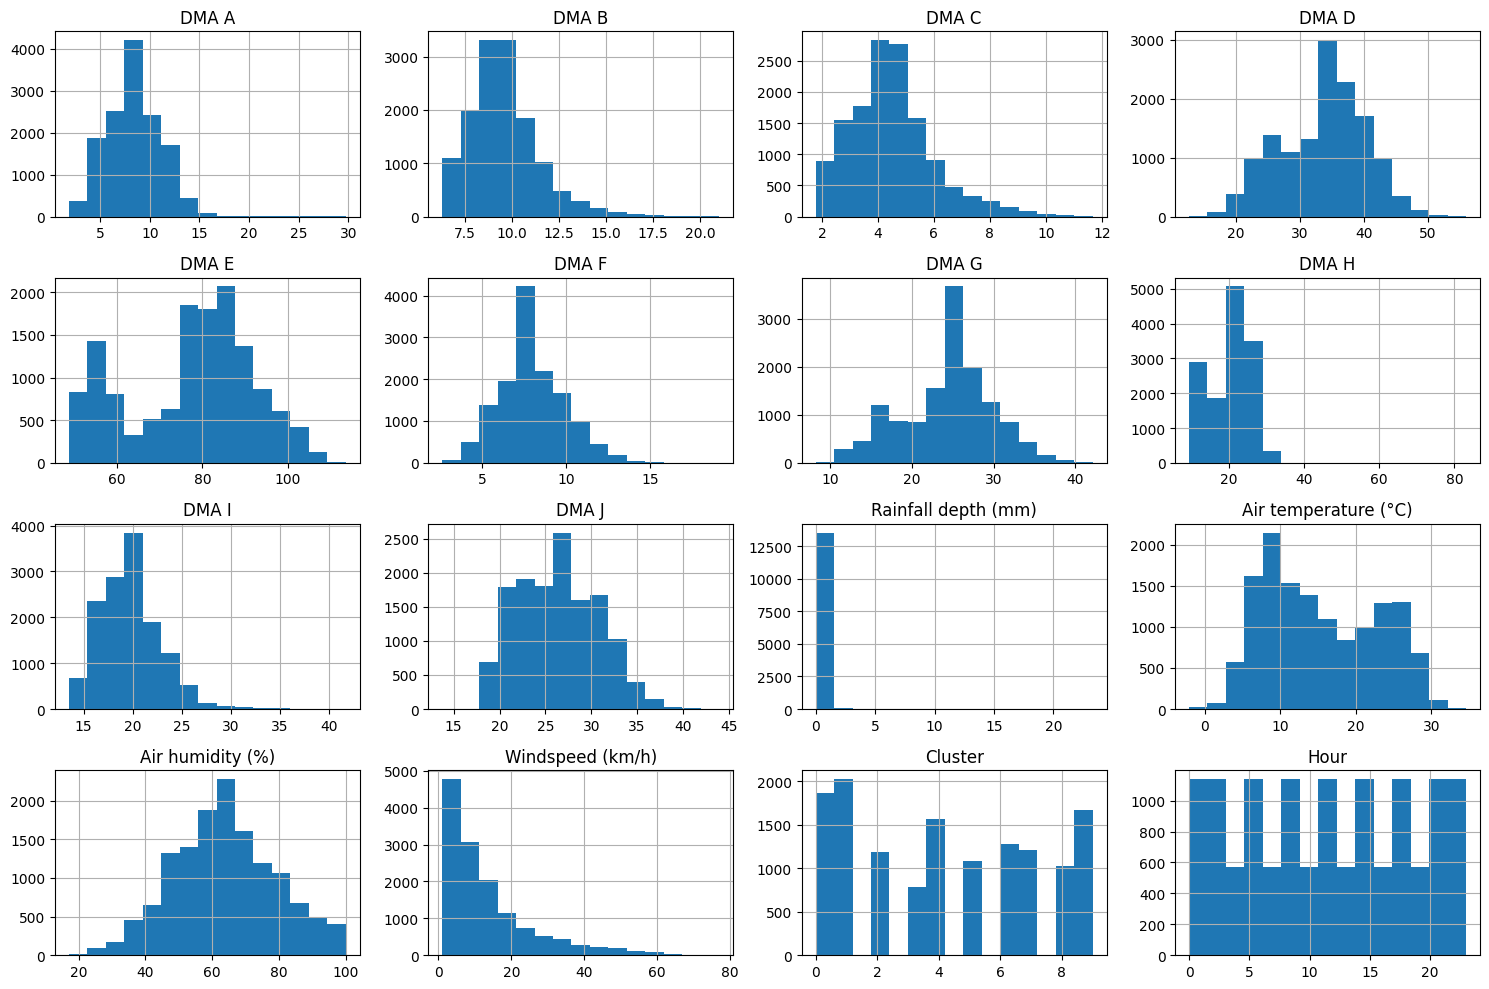

In [17]:
# Seleccionar las columnas numéricas del DataFrame y obtener sus nombres
numeric_cols = df_data.select_dtypes(include=np.number).columns

# Crear un histograma para las columnas numéricas
df_data[numeric_cols].hist(bins=15, figsize=(15, 10))

# Ajustar el diseño del gráfico y mostrarlo
plt.tight_layout()
plt.show()



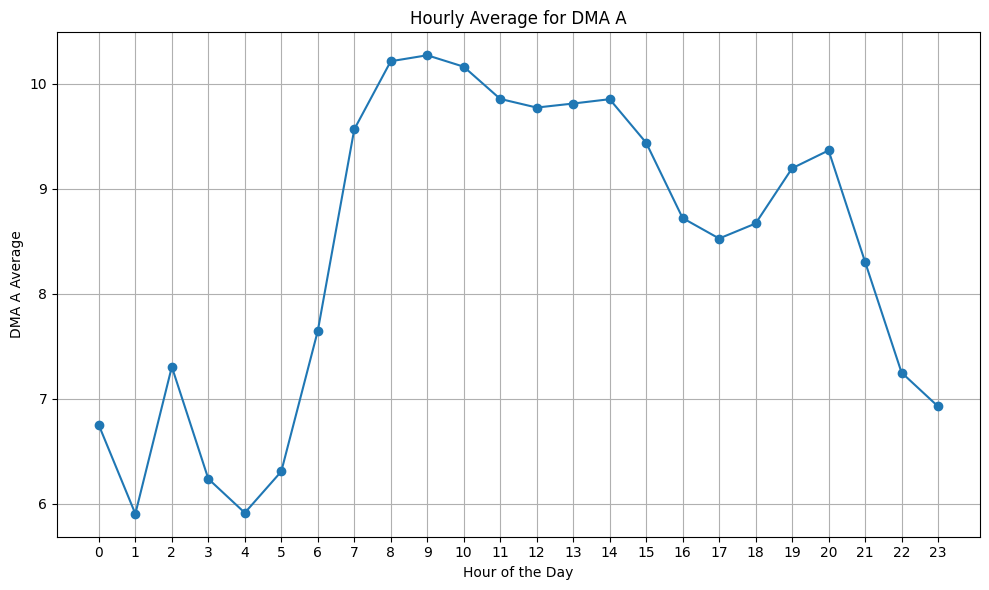

In [10]:
import pandas as pd  # Importar la librería pandas con el alias pd
import matplotlib.pyplot as plt  # Importar el módulo pyplot de la librería matplotlib con el alias plt

# Suponiendo que df_data es tu DataFrame de pandas

# Convertir la columna 'Date' a formato de fecha y hora
df_data['Date'] = pd.to_datetime(df_data['Date'], format="%d/%m/%Y %H:%M")

# Extraer la hora del día
df_data['Hour'] = df_data['Date'].dt.hour

# Agrupar por hora para calcular el promedio horario de DMA A
hourly_averages = df_data.groupby('Hour')['DMA A'].mean().reset_index()

# Visualización con matplotlib
plt.figure(figsize=(10, 6)) 
plt.plot(hourly_averages['Hour'], hourly_averages['DMA A'], marker='o', linestyle='-')  # Graficar el promedio horario de DMA A
plt.title('Promedio Horario para DMA A')  
plt.xticks(range(24))  
plt.tight_layout() o
plt.show()  #


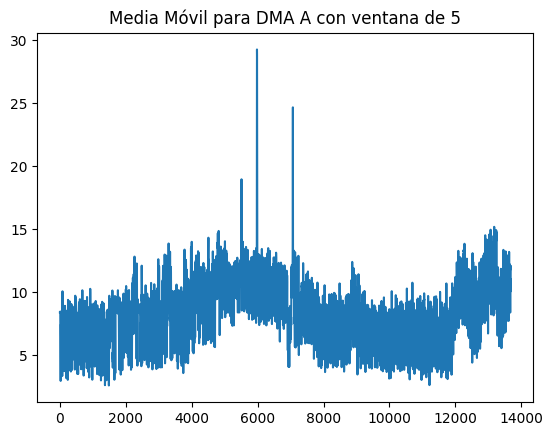

In [7]:
# Ejemplo de cálculo de media móvil para la columna 'DMA A'
df_data['DMA A'].rolling(window=5).mean().plot()
plt.title('Media Móvil para DMA A con ventana de 5')
plt.show()


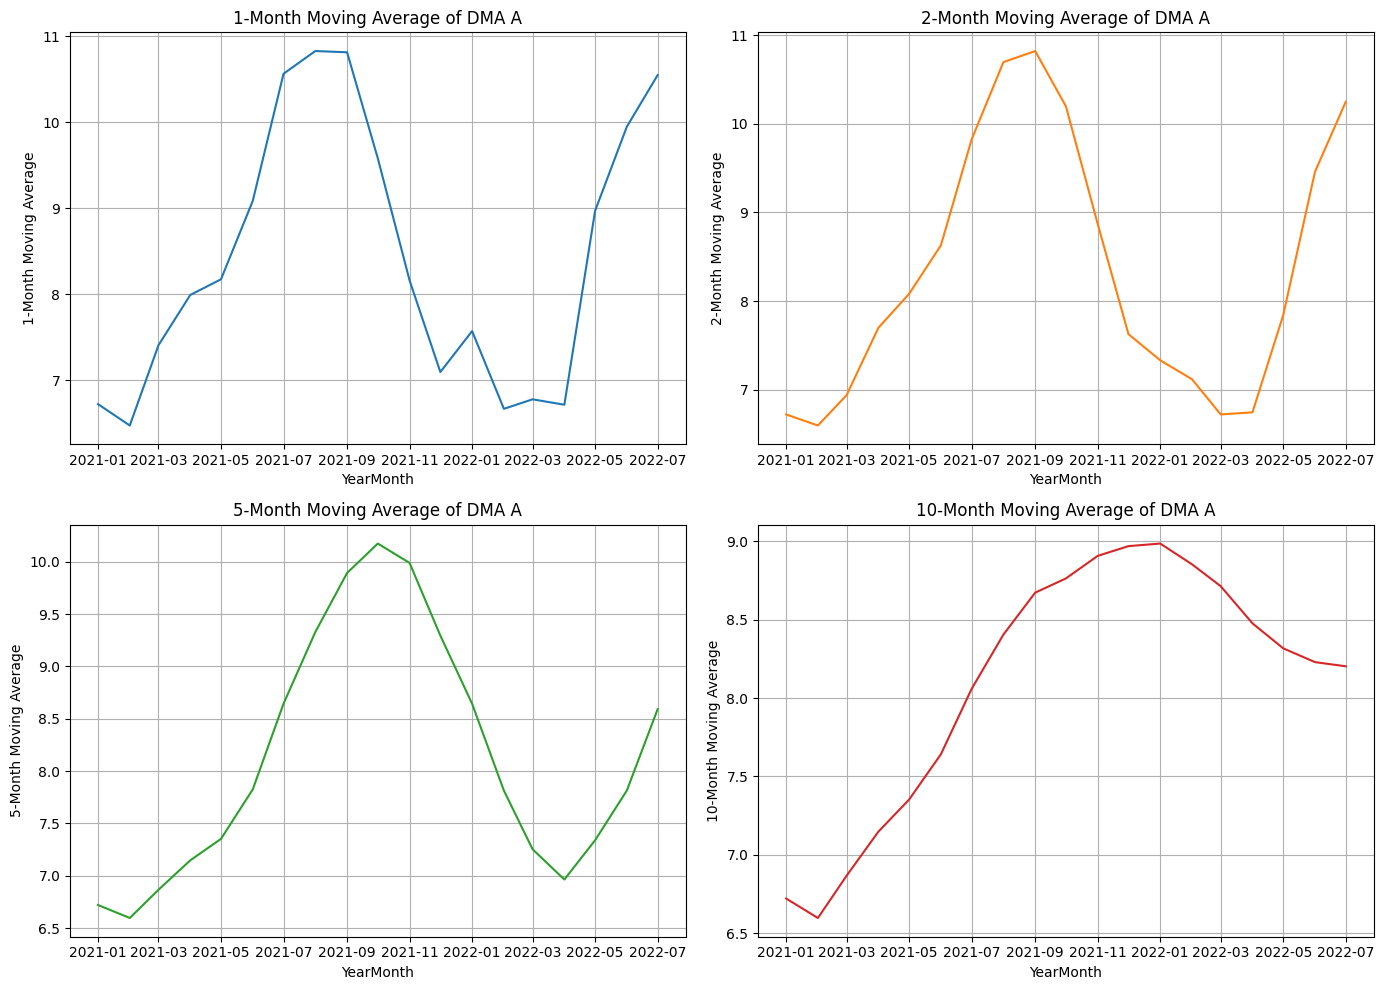

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from matplotlib.gridspec import GridSpec

#Este código realiza el cálculo de medias móviles de diferentes periodos para la columna 'DMA A' de un DataFrame, y luego crea subgráficos para visualizar estas medias móviles a lo largo del tiempo.

df_data_1=df_data.copy()

df_data_1['Date'] = pd.to_datetime(df_data_1['Date'])

df_data_1['YearMonth'] = df_data_1['Date'].dt.to_period('M')

monthly_avg = df_data_1.groupby('YearMonth')['DMA A'].mean().reset_index()

moving_avg_periods = [1, 2, 5, 10]
for period in moving_avg_periods:
    monthly_avg[f'MA_{period}'] = monthly_avg['DMA A'].rolling(window=period, min_periods=1).mean()

monthly_avg['YearMonth'] = monthly_avg['YearMonth'].dt.to_timestamp()

fig = plt.figure(figsize=(14, 10))
gs = GridSpec(2, 2, figure=fig)

for i, period in enumerate(moving_avg_periods):
    ax = fig.add_subplot(gs[i // 2, i % 2])
    ax.plot(monthly_avg['YearMonth'], monthly_avg[f'MA_{period}'], color='C{}'.format(i))
    ax.set_title('{}-Month Moving Average of DMA A'.format(period))
    ax.set_xlabel('YearMonth')
    ax.set_ylabel('{}-Month Moving Average'.format(period))
    ax.grid(True)

plt.tight_layout()
plt.show()


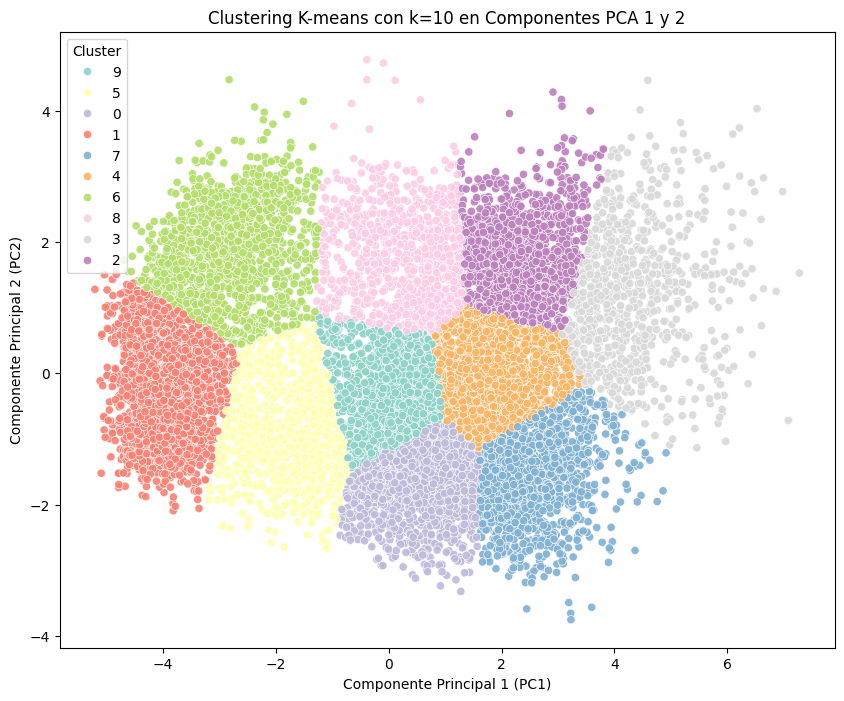

In [18]:
# Importar las librerías necesarias
from sklearn.decomposition import PCA  # Importar PCA de scikit-learn
from sklearn.cluster import KMeans  # Importar KMeans de scikit-learn
import matplotlib.pyplot as plt  # Importar matplotlib para visualización
import seaborn as sns  # Importar seaborn para visualización
import pandas as pd  # Importar pandas para manipulación de datos

# Suponiendo que scaled_df es tu DataFrame escalado

# Realizar el análisis de componentes principales (PCA) con 2 componentes
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_df)

# Convertir los resultados de PCA a un DataFrame
pca_df = pd.DataFrame(pca_results, columns=['PC1', 'PC2'])

# Realizar clustering K-Means
k = 10  # Número de clústeres
km_res = KMeans(n_clusters=k, n_init=25, random_state=42).fit(pca_df[['PC1', 'PC2']])

# Agregar las asignaciones de clúster al DataFrame
pca_df['cluster'] = km_res.labels_.astype(str)  # Convertir etiquetas de clúster a string para la codificación de colores

# Visualización con matplotlib y seaborn
plt.figure(figsize=(10, 8))  # Crear una figura
sns.scatterplot(x='PC1', y='PC2', hue='cluster', palette='Set3', data=pca_df, alpha=0.9)  # Scatter plot con seaborn
plt.title('Clustering K-means con k=10 en Componentes PCA 1 y 2')  # Título del gráfico
plt.xlabel('Componente Principal 1 (PC1)')  # Etiqueta del eje x
plt.ylabel('Componente Principal 2 (PC2)')  # Etiqueta del eje y
plt.legend(title='Cluster')  # Mostrar leyenda con título de "Cluster"
plt.show()  # Mostrar el gráfico



## Outliers

In [19]:
import pandas as pd  # Importar la librería pandas
import numpy as np  # Importar la librería numpy

# Calcular los centroides a partir del resultado de kmeans
centroids = pca_df.groupby('cluster')[['PC1', 'PC2']].mean().reset_index()

# Unir los centroides de nuevo a los datos originales para calcular las distancias
pca_df_with_centroids = pd.merge(pca_df, centroids, on='cluster', suffixes=('', '_centroid'))

# Calcular la distancia euclidiana desde cada punto hasta su centroide de clúster
pca_df_with_centroids['distance'] = np.sqrt((pca_df_with_centroids['PC1'] - pca_df_with_centroids['PC1_centroid'])**2 + 
                                            (pca_df_with_centroids['PC2'] - pca_df_with_centroids['PC2_centroid'])**2)

# Definir el criterio para detectar valores atípicos
pca_df_with_centroids['mean_distance'] = pca_df_with_centroids.groupby('cluster')['distance'].transform('mean')
pca_df_with_centroids['sd_distance'] = pca_df_with_centroids.groupby('cluster')['distance'].transform('std')

# Marcar los valores atípicos
pca_df_with_centroids['outlier'] = pca_df_with_centroids['distance'] > (pca_df_with_centroids['mean_distance'] + 1.5 * pca_df_with_centroids['sd_distance'])

# Filtrar los valores atípicos
df_no_outliers = pca_df_with_centroids[pca_df_with_centroids['outlier'] == False].copy()


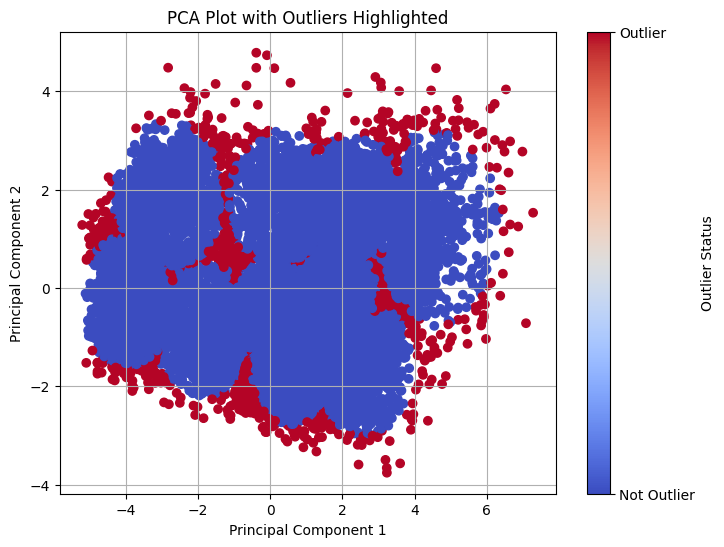

In [15]:
import matplotlib.pyplot as plt

# Grafica PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df_with_centroids['PC1'], pca_df_with_centroids['PC2'], c=pca_df_with_centroids['outlier'], cmap='coolwarm')
plt.colorbar(label='Outlier Status', ticks=[0, 1], format=plt.FuncFormatter(lambda val, loc: ['Not Outlier', 'Outlier'][int(val)]))
plt.title('PCA Plot with Outliers Highlighted')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


In [7]:
!nbmerge 1punto_python.ipynb 2punto_python.ipynb 3punto_python.ipynb > combined_notebook.ipynb
